In [1253]:
import Quandl
import numpy as np
from scipy import stats
import statsmodels
import statsmodels.api as sm
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.stats.diagnostic import het_white, het_breushpagan

In [1254]:
QUANDL_API_KEY = 'MNJzKfdjWBuixA5t61h1'

def get_quandl_data(code):
    return Quandl.get(code, authtoken=QUANDL_API_KEY)

### [Number of new utility patents](https://www.quandl.com/data/USPTO/PAT_ACT-U-S-Patent-Activity)

In [1255]:
patents = get_quandl_data("USPTO/PAT_ACT")
patents = patents['Utility Patents']

In [1256]:
patents.head()

Year
1790-12-31     3.0
1791-12-31    33.0
1792-12-31    11.0
1793-12-31    20.0
1794-12-31    22.0
Name: Utility Patents, dtype: float64

### [Natural resource rents as a percentage of GDP](https://www.quandl.com/data/WWDI/USA_NY_GDP_TOTL_RT_ZS-Total-natural-resources-rents-of-GDP-United-States)

In [1257]:
natural_resources = get_quandl_data("WWDI/USA_NY_GDP_TOTL_RT_ZS")['Value']
natural_resources.name = 'Natural Resources'
natural_resources /= 100

In [1258]:
natural_resources.head()

Date
1970-12-31    0.010006
1971-12-31    0.010355
1972-12-31    0.009789
1973-12-31    0.012949
1974-12-31    0.035525
Name: Natural Resources, dtype: float64

### [Government R&D investment](https://fred.stlouisfed.org/series/Y057RA3A086NBEA)

In [1259]:
rd_public = pd.read_csv('rd_public.csv', index_col='DATE', parse_dates=True)['Y057RA3A086NBEA']
rd_public.name = 'R&D Public'
rd_public = rd_public.resample('A').first()

In [1260]:
rd_public.head()

DATE
1929-12-31    0.390
1930-12-31    0.533
1931-12-31    0.641
1932-12-31    0.807
1933-12-31    0.782
Freq: A-DEC, Name: R&D Public, dtype: float64

### [Private R&D investment](https://fred.stlouisfed.org/series/Y006RA3A086NBEA)

In [1261]:
rd_private = pd.read_csv('rd_private.csv', index_col='DATE', parse_dates=True)['Y006RA3A086NBEA']
rd_private.name = 'R&D Private'
rd_private = rd_private.resample('A').first()

In [1262]:
rd_private.head()

DATE
1929-12-31    0.890
1930-12-31    0.988
1931-12-31    1.195
1932-12-31    1.192
1933-12-31    1.207
Freq: A-DEC, Name: R&D Private, dtype: float64

### [Number of doctorates](https://www.quandl.com/data/NSF/DOCTORATES--Doctorate-Recipients-from-U-S-Colleges-and-Universities)

In [1263]:
doctorates = get_quandl_data("NSF/DOCTORATES")['Number']
doctorates.name = '# of Doctorates'
doctorates = doctorates.shift(-1, freq='D')

In [1264]:
doctorates.head()

Year
1956-12-31     8611.0
1957-12-31     8773.0
1958-12-31     9213.0
1959-12-31     9733.0
1960-12-31    10413.0
Freq: A-DEC, Name: # of Doctorates, dtype: float64

### [Number of venture capital deals](https://www.quandl.com/data/NVCA/VENTURE_3_11-Venture-Capital-Investments-By-State-Number-of-Deals)

In [1265]:
venture_capital = get_quandl_data("NVCA/VENTURE_3_11")['Total']
venture_capital.name = '# of VC Deals'

In [1266]:
venture_capital.head()

Year
1985-12-31    1345.0
1986-12-31    1421.0
1987-12-31    1646.0
1988-12-31    1526.0
1989-12-31    1544.0
Name: # of VC Deals, dtype: float64

### [Unemployment rate](https://www.quandl.com/data/FRED/UNRATE-Civilian-Unemployment-Rate)

In [1267]:
unemployment = get_quandl_data("FRED/UNRATE")['VALUE']
unemployment = unemployment.shift(-1, freq='D')
unemployment = unemployment.resample('A').first()
unemployment.name = "Unemployment rate (%)"
unemployment /= 100

In [1268]:
unemployment.head()

DATE
1947-12-31    0.034
1948-12-31    0.038
1949-12-31    0.047
1950-12-31    0.064
1951-12-31    0.034
Freq: A-DEC, Name: Unemployment rate (%), dtype: float64

### [Immigration](http://www.migrationpolicy.org/programs/data-hub/charts/immigrant-population-over-time?width=1000&height=850&iframe=true)

In [1269]:
immigration = pd.read_csv('us_immigration.csv', index_col='Year', thousands=',', parse_dates=True)['Number of Legal Permanent Residents']
immigration.name = 'New Legal Permanent Residents'
immigration = immigration.shift(-1, freq='D')

In [1270]:
immigration.head()

Year
1819-12-31    8385
1820-12-31    9127
1821-12-31    6911
1822-12-31    6354
1823-12-31    7912
Freq: A-DEC, Name: New Legal Permanent Residents, dtype: int64

### [Inflation](https://www.quandl.com/data/WORLDBANK/USA_FP_CPI_TOTL_ZG-United-States-Inflation-consumer-prices-annual)

In [1271]:
cpi = get_quandl_data('WORLDBANK/USA_FP_CPI_TOTL_ZG')['Value']
cpi.name = 'CPI'

In [1272]:
cpi.head()

Date
1961-12-31    1.075182
1962-12-31    1.116071
1963-12-31    1.214128
1964-12-31    1.308615
1965-12-31    1.668461
Name: CPI, dtype: float64

### [Post-secondary school enrollment](https://www.quandl.com/data/WORLDBANK/USA_SE_TER_ENRR-United-States-School-enrollment-tertiary-gross)

In [1273]:
tertiary_education_enrollment = get_quandl_data("WORLDBANK/USA_SE_TER_ENRR")['Value']
tertiary_education_enrollment.name = 'Post-secondary school enrollment (%)'
tertiary_education_enrollment /= 100

In [1274]:
tertiary_education_enrollment.head()

Date
1971-12-31    0.470459
1972-12-31    0.479784
1973-12-31    0.485346
1974-12-31    0.489661
1975-12-31    0.510441
Name: Post-secondary school enrollment (%), dtype: float64

### [Number of IPOs](https://www.quandl.com/data/RITTER/US_IPO_STATS-Historical-US-IPO-Statistics)

In [1275]:
ipos = get_quandl_data("RITTER/US_IPO_STATS")['Gross Number of IPOs']
ipos.name = "# of IPOs"
ipos = ipos.resample('A').sum()

In [1276]:
ipos.head()

Date
1960-12-31    269.0
1961-12-31    435.0
1962-12-31    298.0
1963-12-31     83.0
1964-12-31     97.0
Freq: A-DEC, Name: # of IPOs, dtype: float64

### [% of degrees that are STEM](https://www.nsf.gov/statistics/data.cfm)

In [1277]:
stem_degree_percent = pd.read_csv("stem_degrees.csv", index_col='year', parse_dates=True)
stem_degree_percent /= 100
stem_degree_percent = stem_degree_percent.resample('A').first()
stem_degree_percent = stem_degree_percent['Doctorate']
stem_degree_percent.name = "% of doctorates that are STEM"

In [1279]:
stem_degree_percent.head()

year
1966-12-31    0.645
1967-12-31    0.643
1968-12-31    0.638
1969-12-31    0.633
1970-12-31    0.612
Freq: A-DEC, Name: % of doctorates that are STEM, dtype: float64

In [1280]:
list_of_factors = [
#     natural_resources,
    rd_public,
    rd_private,
#     doctorates,
#     venture_capital,
#     unemployment,
    immigration,
#     cpi,
#     tertiary_education_enrollment,
    stem_degree_percent,
    ipos
]

In [1281]:
factors = pd.concat(list_of_factors, 1)

In [1282]:
joined = pd.concat([patents, factors], 1)
joined = joined.dropna()

In [1283]:
patents = joined.pop('Utility Patents')
factors = joined

In [1284]:
patents.head()

1966-12-31    68405.0
1967-12-31    65652.0
1968-12-31    59104.0
1969-12-31    67559.0
1970-12-31    64429.0
Freq: A-DEC, Name: Utility Patents, dtype: float64

In [1285]:
factors.head()

,R&D Public,R&D Private,New Legal Permanent Residents,% of doctorates that are STEM,# of IPOs
1966-12-31,48.144,16.762,361972.0,0.645,84.0
1967-12-31,50.108,18.523,454448.0,0.643,100.0
1968-12-31,51.300,20.035,358579.0,0.638,368.0
1969-12-31,50.792,21.347,373326.0,0.633,781.0
1970-12-31,47.143,21.429,370478.0,0.612,358.0


In [1286]:
factors.tail()

,R&D Public,R&D Private,New Legal Permanent Residents,% of doctorates that are STEM,# of IPOs
2008-12-31,97.993,102.839,1130818.0,0.673,54.0
2009-12-31,100.000,100.000,1042625.0,0.675,76.0
2010-12-31,101.221,102.351,1062040.0,0.690,197.0
2011-12-31,100.091,103.336,1031631.0,0.705,180.0
2012-12-31,96.455,106.049,990553.0,0.702,179.0


In [1287]:
factors.describe()

,R&D Public,R&D Private,New Legal Permanent Residents,% of doctorates that are STEM,# of IPOs
count,47.000000,47.000000,4.700000e+01,47.000000,47.000000
mean,67.512383,55.938298,7.631757e+05,0.622681,333.234043
std,17.772244,28.786743,3.340952e+05,0.035815,249.267990
min,43.902000,16.762000,3.585790e+05,0.561000,9.000000
25%,51.046000,27.480500,5.116940e+05,0.597000,132.000000
50%,66.215000,54.414000,6.532060e+05,0.628000,255.000000
75%,77.174000,82.866500,1.037128e+06,0.640000,526.500000
max,101.221000,106.049000,1.826595e+06,0.705000,953.000000


# Visualise Data

/usr/local/lib/python3.4/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


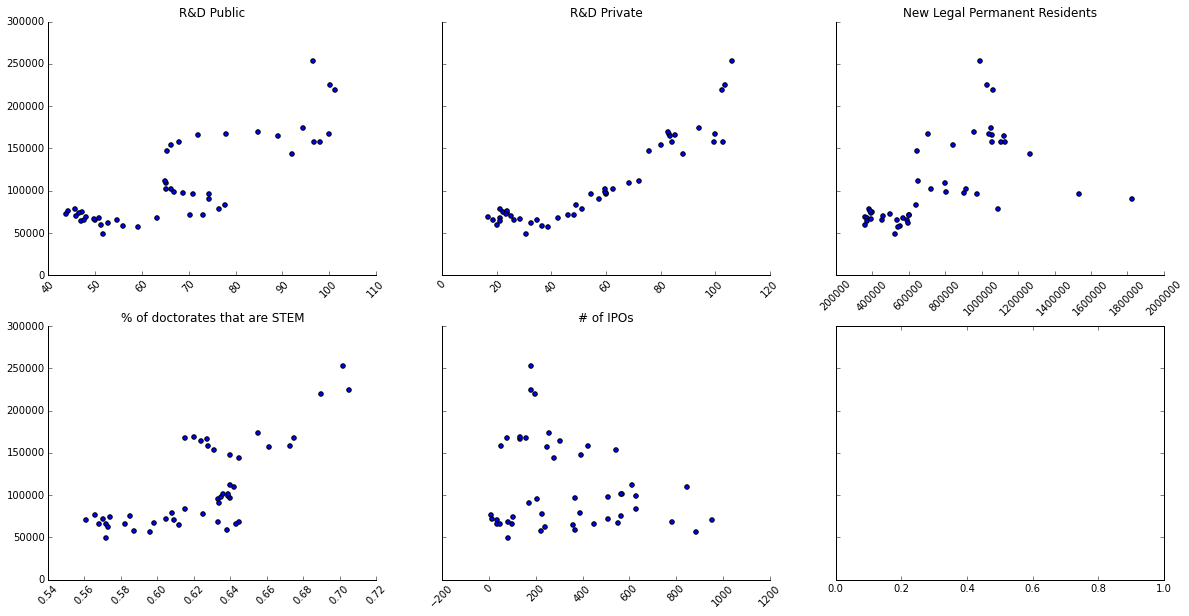

In [1289]:
f, axes = plt.subplots(2, 3, sharey=True, figsize=(20,10))
for factor, ax in zip(factors, axes.ravel()):
    ax.scatter(factors[factor], patents);
    ax.set_title(factor)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

# Model

### Train-Test Split (80/20)

In [1107]:
X_train, X_test, y_train, y_test = train_test_split(factors, patents, test_size=0.20)

### Train model

In [1182]:
model_factors = sm.add_constant(X_train)
model = sm.OLS(y_train, model_factors)
results = model.fit()

### Are our residuals heteroscedastic?

In [1183]:
_, _, f, pval = het_white(results.resid, model_factors)

In [1184]:
print("P value of the f-stat: %s" % pval)

P value of the f-stat: 0.000370452969527


### ... yes, yes they are heteroscedastic.
### We can use a robust covariance matrix to adjust for this affect.

In [1185]:
results.get_robustcov_results().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Utility Patents   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     53.46
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           2.54e-14
Time:                        22:57:45   Log-Likelihood:                -408.69
No. Observations:                  37   AIC:                             829.4
Df Residuals:                      31   BIC:                             839.1
Df Model:                           5                                         
Covariance Type:                  HC1                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------
const                         -1.205e+05    5.9e+04     -2.041      0.050     -2.41e+05   -66.169
R&D Public                     -535.2427    361.129     -1.482      0.148     -1271.770   201.284
R&D Private                    1902.4308    180.239     10.555      0.000      1534.832  2270.030
New Legal Permanent Residents    -0.0324      0.008     -3.817      0.001        -0.050    -0.015
Doctorate                      3.178e+05   1.08e+05      2.941      0.006      9.74e+04  5.38e+05
# of IPOs                       -44.4127      9.132     -4.863      0.000       -63.038   -25.788
==============================================================================
Omnibus:                        1.978   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.372   Jarque-Bera (JB):                0.964
Skew:                          -0.146   Prob(JB):                        0.618
Kurtosis:                       3.735   Cond. No.                     4.26e+07
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 4.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Test model out of sample

In [1112]:
model_test_factors = sm.add_constant(X_test)
oos_predictions = results.predict(model_test_factors)

In [1113]:
pd.DataFrame({'Predicted': oos_predictions, 'Actual': y_test})

,Actual,Predicted
DATE,,
1995-12-31,101419.0,111243.921277
2004-12-31,164290.0,139033.656881
1978-12-31,66102.0,73906.628228
1972-12-31,74810.0,44924.232814
1998-12-31,147517.0,153527.874262
2005-12-31,143806.0,149727.634559
1984-12-31,67200.0,73774.804271
1979-12-31,48854.0,71298.238147
1971-12-31,78317.0,59094.575738


/usr/local/lib/python3.4/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


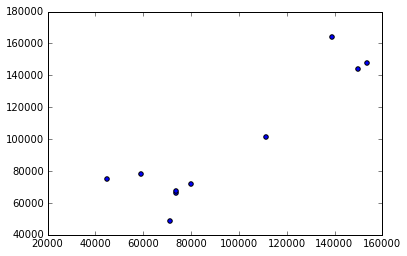

In [1116]:
plt.scatter(oos_predictions, y_test);

In [1117]:
r2_score(y_test, oos_predictions)

0.81592955277284562